In [4]:
using ITensors,ITensorMPS
using RandomMeas
using ProgressBars


In [5]:
N  = 6
χ = 2^(N÷2)
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [3]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)[1]
end
println("purities ", p);

purities [0.6624962372466843, 0.4071863212936276, 0.317884071439245, 0.3370963550222339, 0.5392938172439969, 0.9999999999999982]


In [6]:
#Perform Randomized measurements
nu=100
NM=100
data = zeros(Int8,(nu,NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
    u = get_rotations(ξ,1) #Haar rotations in A
    data[r,:,:] = get_RandomMeas(ψ,u,NM)
end

0.0%┣                                              ┫ 0/100 [00:03<-5:-8, -3s/it]
1.0%┣▍                                         ┫ 1/100 [00:35<Inf:Inf, InfGs/it]
100.0%┣███████████████████████████████████████████┫ 100/100 [00:35<00:00, 3it/s]
100.0%┣███████████████████████████████████████████┫ 100/100 [00:35<00:00, 3it/s]


In [11]:
ps = zeros(N)
for NA in ProgressBar(1:N, printing_delay=2)
        ps[NA] = get_purity_hamming(data[:,:,1:NA],ξ[1:NA])
end
println("estimated purities ",ps);

0.0%┣                                                ┫ 0/6 [00:00<00:00, -0s/it]


estimated purities 

100.0%┣██████████████████████████████████████████████┫ 6/6 [00:00<00:00, 83it/s]
100.0%┣██████████████████████████████████████████████┫ 6/6 [00:00<00:00, 82it/s]


[0.7331636363636362, 0.5035151515151515, 0.3227393939393938, 0.33381818181818196, 0.5766545454545452, 1.0524424242424244]


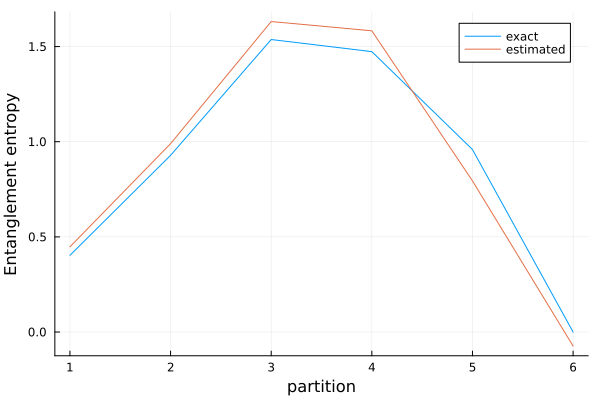

In [8]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()